# Практическая работа 1

Выполнила: Бабаян Анастасия, ММР214

**Будем анализировать датасет с данными об успеваемости из двух средних школ в Португалии. Он содержит два набора данных об успеваемости по 
математике и по португальскому языку. Но анализировать будем один датасет - только по математике.**

Цель - проанализировать влияние алкоголя на успеваемость учеников

Подключаем нужные библиотеки

In [1]:
import pandas as pd # библиотека для обработки и анализа данных
import numpy as np #  для работы с многомерными массивами
import seaborn as sns # еще одна библиотека для визуализации данных
import matplotlib.pyplot as plt # библиотека для визуализации данных двумерной графикой

from sklearn.preprocessing import LabelEncoder # для матрицы корреляции, когда преобразуем данные в столбцах

Вычитываем данные из нашей таблицы и выводим их

In [2]:
df_maths = pd.read_csv("Maths.csv") # читаем наш csv с данными по математике
df_maths.head(10) # выводим первые 10 строк данных

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


Проанализируем имеющиеся данные

In [3]:
print(df_maths.info()) # Выведим данные о нашем датасете, чтобы понять, что мы будем анализировать.
print("\n Колличество объектов:", df_maths.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Видим, какие у нас есть столбцы в таблице, и видим общее число данных для анализа

In [4]:
is_null_cols = df_maths.isnull() # получаем информацию по нулевым данных в столбцах
is_null_cols.sum() # получаем общий результат по кол-ву нулей в конкретных столбиках

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
Видим, что у нас нет нулевых столбцов и все данные заполнены, означает, что мы можем их проанализировать

SyntaxError: invalid syntax (3025400.py, line 1)

Определимся, какие у нас есть столбы и что они означают

Binary - двоичный вариант, либо одно, либо другое

**school** - навзание школы (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

**sex** - пол (binary: 'F' - девочка or 'M' - мальчик)

**age** - возраст (numeric: from 15 to 22)

**address** - место проживания студента (binary: 'U' - город or 'R' - деревня)

**famsize** - размер семьи (binary: 'LE3' - меньше или равно 3 или 'GT3' - больше 3)

**Pstatus** - статус совместного проживания родителей (binary: 'T' - живут вместе or 'A' - раздельно)

**Medu** - образование матери (numeric: 0 - нет образования, 1 - начальное (4 класса), 2 - с 5 по 9 класс, 3 - среднее or 4 - высшее образование)

**Fedu** - образование отца (numeric: 0 - нет образования, 1 - начальное (4 класса), 2 - с 5 по 9 класс, 3 - среднее or 4 - высшее образование)

**Mjob** - работа матери (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

**Fjob** - работа отца (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

**reason** - причина выбора школы (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

**guardian** - опекун студента (nominal: 'mother', 'father' or 'other')

**traveltime** - время в пути до школы (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

**studytime** - еженедельное учебное время (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

**failures** - кол-во раз, когда оставался на второй год (numeric: n if 1<=n<3, else 4)

**schoolsup** - посещает ли дополнительные кружки в школе (binary: yes or no) 

**famsup** - посещает ли дополнительные занятия вне школы (binary: yes or no)

**paid** - дополнительные платные занятия по предмету курса (Math or Portuguese) (binary: yes or no)

**activities** - внеклассные занятия (binary: yes or no)

**nursery** - посещал ли детский сад (binary: yes or no)

**higher** - хочет получить высшее образование (binary: yes or no)

**internet** - Есть ли доступ в интернет дома (binary: yes or no)

**romantic** - состоит в романтических отношениях (binary: yes or no)

**famrel** - качество отношения в семье (numeric: from 1 - very bad to 5 - excellent)

**freetime** - свободное время вне школы (numeric: from 1 - very low to 5 - very high)

**goout** - оценка кол-во прогулок с друзьями (numeric: from 1 - very low to 5 - very high)

Важные:

**Dalc** - потребление алкоголя в рабочие дни (numeric: from 1 - very low to 5 - very high)

**Walc** - потребление алкоголя в выходные (numeric: from 1 - very low to 5 - very high)

**health** - текущее состояние здоровья (numeric: from 1 - very bad to 5 - very good)

**absences** - количество пропусков занятий (numeric: from 0 to 93)**

Оценки по курсу:

**G1** - оценка за первый период (numeric: from 0 to 20)

**G2** - оценка за второй период (numeric: from 0 to 20)

**G3** - оценка за последний период (numeric: from 0 to 20, output target)

Переименуем наши столбики, чтобы стало нагляднее

In [6]:
df_maths.rename (columns = {'school': 'Навзание школы', 
                            'sex': 'Пол', 
                            'age': 'Возраст', 
                            'address': 'Место проживания студента',
                            'famsize': 'Размер семьи',
                            'Pstatus': 'Совместное проживания родителей',
                            'Medu': 'Образование матери',
                            'Fedu': 'Образование отца',
                            'Mjob': 'Работа матери',
                            'Fjob': 'Работа отца',
                            'reason': 'Причина выбора школы',
                            'guardian': 'Опекун студента',
                            'traveltime': 'Время в пути до школы',
                            'studytime': 'Еженедельное учебное время',
                            'failures': 'Кол-во оставления на второй год',
                            'schoolsup': 'Посещение доп. кружков в школе',
                            'famsup': 'Посещение доп. занятий вне школы',
                            'paid': 'Посещение платных занятий',
                            'activities': 'Посещение внеклассных занятий',
                            'nursery': 'Посещал ли дет. сад',
                            'higher': 'Желание получить высшее образование',
                            'internet': 'Есть ли доступ в интернет',
                            'romantic': 'Состоит ли в отношениях',
                            'famrel': 'Качество отношения в семье',
                            'freetime': 'Свободное время вне школы',
                            'goout': 'Кол-во прогулок с друзьями',
                            'Dalc': 'Потребление алкоголя в рабочие дни',
                            'Walc': 'Потребление алкоголя в выходные',
                            'health': 'Текущее состояние здоровья',
                            'absences': 'Количество пропусков занятий',
                            'G1': 'Оценка за первый период',
                            'G2': 'Оценка за второй период',
                            'G3': 'Оценка за последний период'
                            }, inplace = True) # замена названий колонок

Проверим вывод, и убедимся, что сделали все правильно

In [7]:
df_maths.columns

Index(['Навзание школы', 'Пол', 'Возраст', 'Место проживания студента',
       'Размер семьи', 'Совместное проживания родителей', 'Образование матери',
       'Образование отца', 'Работа матери', 'Работа отца',
       'Причина выбора школы', 'Опекун студента', 'Время в пути до школы',
       'Еженедельное учебное время', 'Кол-во оставления на второй год',
       'Посещение доп. кружков в школе', 'Посещение доп. занятий вне школы',
       'Посещение платных занятий', 'Посещение внеклассных занятий',
       'Посещал ли дет. сад', 'Желание получить высшее образование',
       'Есть ли доступ в интернет', 'Состоит ли в отношениях',
       'Качество отношения в семье', 'Свободное время вне школы',
       'Кол-во прогулок с друзьями', 'Потребление алкоголя в рабочие дни',
       'Потребление алкоголя в выходные', 'Текущее состояние здоровья',
       'Количество пропусков занятий', 'Оценка за первый период',
       'Оценка за второй период', 'Оценка за последний период'],
      dtype='object'

In [8]:
df_maths.head()

,Навзание школы,Пол,Возраст,Место проживания студента,Размер семьи,Совместное проживания родителей,Образование матери,Образование отца,Работа матери,Работа отца,...,Качество отношения в семье,Свободное время вне школы,Кол-во прогулок с друзьями,Потребление алкоголя в рабочие дни,Потребление алкоголя в выходные,Текущее состояние здоровья,Количество пропусков занятий,Оценка за первый период,Оценка за второй период,Оценка за последний период
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Отлично, теперь выглядит хорошо, можно приступать к анализу данных

# Анализ данных

<AxesSubplot:>

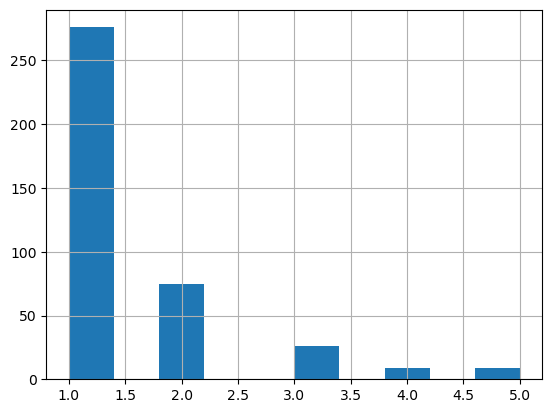

In [9]:
df_maths['Потребление алкоголя в рабочие дни'].hist()

Видим, что большинство употребляют алкоголь в рабочие дни редко

<AxesSubplot:>

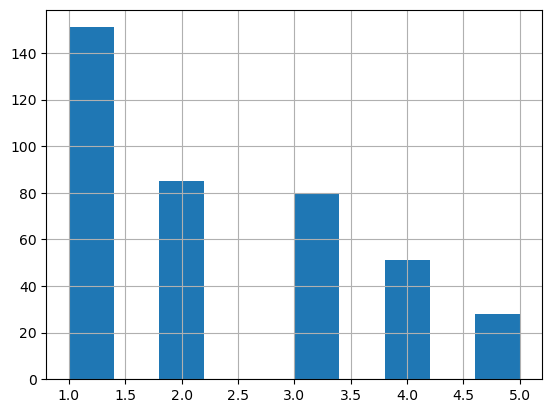

In [10]:
df_maths['Потребление алкоголя в выходные'].hist()

Ситуация с выходными другая, видно, что кол-во людей употребляющих алкоголь больше, чем тех, которые употребляют алкоголь в рабочие дни

Теперь проанализурем, сколько студентов живет в деревне и в городе, но для начала заменим данные

In [11]:
# binary: 'U' - город or 'R' - деревня
df_maths["Место проживания студента"].replace({"U": "Город", "R": "Деревня"}, inplace=True)

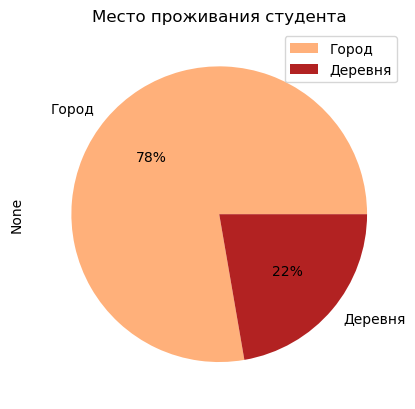

In [12]:
colors = ['#FFB07A', '#B22222']
places = df_maths.groupby("Место проживания студента").size()
places.plot.pie(autopct='%1.0f%%', colors = colors, title = 'Место проживания студента').legend()

Видим, что большенство людей проживают в городе, давайте теперь построим гистограмму по алкоголю для людей из деревни и из города, поймем, есть ли зависимость.

Будем брать людей с потреблением алкоголя от 2 до 5, что позволит понять где больше пьющих людей (будем считать в процентах от общего числа конкретной местности (город или деревня))

<AxesSubplot:>

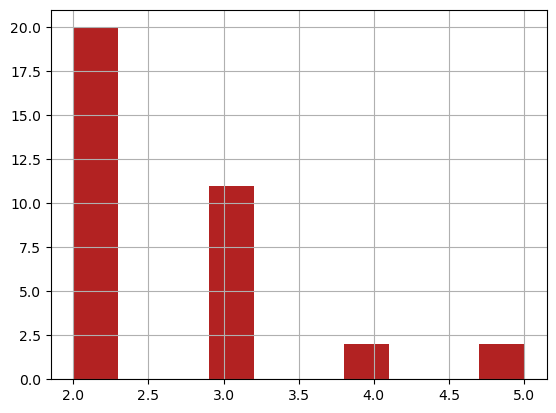

In [13]:
country_alco = df_maths.query("`Место проживания студента` == 'Деревня' and `Потребление алкоголя в рабочие дни` >= 2")['Потребление алкоголя в рабочие дни']
country_alco.hist(color = '#B22222')

In [14]:
# Считаем для деревни в будние
mdata = df_maths.query("`Место проживания студента` == 'Деревня' and `Потребление алкоголя в рабочие дни` >= 2")
drink_from_country_work_day = len(mdata)
drink_from_country_work_day

35

In [15]:
# Считаем для деревни в выходные
mdata = df_maths.query("`Место проживания студента` == 'Деревня' and `Потребление алкоголя в выходные` >= 2")
drink_from_country_weekend_day = len(mdata)
drink_from_country_weekend_day

63

Анализируем для города

<AxesSubplot:>

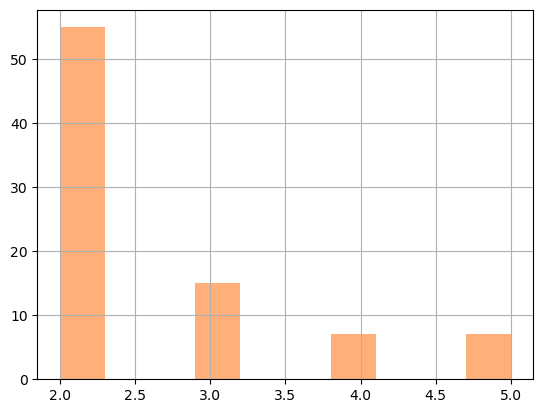

In [16]:
city_alco = df_maths.query("`Место проживания студента` == 'Город' and `Потребление алкоголя в рабочие дни` >= 2")['Потребление алкоголя в рабочие дни']
city_alco.hist(color = '#FFB07A')

In [17]:
# Считаем для города в будние
mdata = df_maths.query("`Место проживания студента` == 'Город' and `Потребление алкоголя в рабочие дни` >= 2")
drink_from_city_work_day = len(mdata)
drink_from_city_work_day

84

In [18]:
# Считаем для города в выходные
mdata = df_maths.query("`Место проживания студента` == 'Город' and `Потребление алкоголя в выходные` >= 2")
drink_from_city_weekend_day = len(mdata)
drink_from_city_weekend_day

181

Промежуточные итоги: Видим, что кол-во человек употребляющих алкоголь в деревне с уровнем потребления выше или равной 2 для деревни составляет 35, а для города 84 человека. Посчитаем процент от общего числа

In [19]:
# общее число людей из деревни и города
count_of_country = len(df_maths.query("`Место проживания студента` == 'Деревня'"))
count_of_city = len(df_maths.query("`Место проживания студента` == 'Город'"))

# процент для будней
percent_in_country_work_day = (drink_from_country_work_day * 100) / count_of_country
percent_in_city_work_day = (drink_from_city_work_day * 100) / count_of_city

# процент для выходных
percent_in_country_weekend_day = (drink_from_country_weekend_day * 100) / count_of_country
percent_in_city_weekend_day = (drink_from_city_weekend_day * 100) / count_of_city

print('В деревне. Будние: %f%% Выходные: %f%%' % (percent_in_country_work_day, percent_in_country_weekend_day))
print('В городе. Будние: %f%% Выходные: %f%%' % (percent_in_city_work_day, percent_in_city_weekend_day))

В деревне. Будние: 39.772727% Выходные: 71.590909%
В городе. Будние: 27.361564% Выходные: 58.957655%


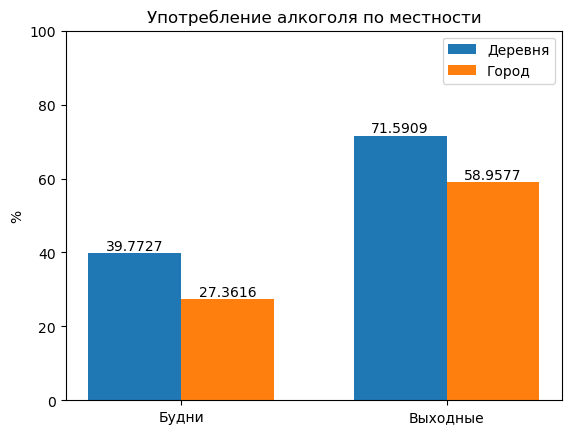

In [20]:
labels = ['Будни', 'Выходные']
county_data = [percent_in_country_work_day, percent_in_country_weekend_day]
city_data = [percent_in_city_work_day, percent_in_city_weekend_day]

x = np.arange(len(labels))  
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, county_data, width, label='Деревня')
rects2 = ax.bar(x + width/2, city_data, width, label='Город')

# Добавляем текстовки для графика
ax.set_ylabel('%')
ax.set_title('Употребление алкоголя по местности')
ax.set_xticks(x, labels) # проставляем названия для графика
ax.set_ylim([0, 100]) # выправляем график для того, чтобы было в процентах
ax.legend()

# добавляем проценты на график

ax.bar_label(rects1) 
ax.bar_label(rects2)

plt.show()

Делаем вывод, что в деревне студенты пьют алкоголь больше, в процентом соотношении. В выходные, 71% людей из деревни пьют алкоголь

Хочется так же понять, кто больше употребляет алкоголя мальчики или девочки

In [21]:
female_drinks_day = df_maths.query("`Пол` == 'F' and (`Потребление алкоголя в рабочие дни` >= 2 or `Потребление алкоголя в выходные` >= 2)")
female_drinks_сount = len(female_drinks_day)

male_drinks_day = df_maths.query("`Пол` == 'M' and (`Потребление алкоголя в рабочие дни` >= 2 or `Потребление алкоголя в выходные` >= 2)")
male_drinks_сount = len(male_drinks_day)



In [22]:
# общее число девочек и мальчиков
count_of_female = len(df_maths.query("`Пол` == 'F'"))
count_of_male = len(df_maths.query("`Пол` == 'M'"))

# процент для будней
percent_female_drinks = (female_drinks_сount * 100) / count_of_female
percent_male_drinks = (male_drinks_сount * 100) / count_of_male


print('Употребляют в процентах Девочки: %f%% Мальчики: %f%%' % (percent_female_drinks, percent_male_drinks))

Употребляют в процентах Девочки: 54.807692% Мальчики: 70.053476%


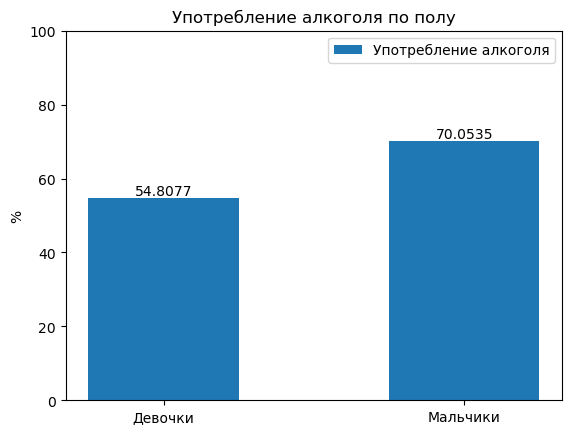

In [23]:
labels = ['Девочки', 'Мальчики']
drinks_data = [percent_female_drinks, percent_male_drinks]

x = np.arange(len(labels)) 

fig, ax = plt.subplots()
rect = ax.bar(x, drinks_data, 0.5, label='Употребление алкоголя')

# Добавляем текстовки для графика
ax.set_ylabel('%')
ax.set_title('Употребление алкоголя по полу')
ax.set_xticks(x, labels) # проставляем названия для графика
ax.set_ylim([0, 100]) # выправляем график для того, чтобы было в процентах
ax.legend()

# добавляем проценты на график

ax.bar_label(rect) 

plt.show()

### Промежуточные итоги

1. У мальчиков уровень употребления алкоголя выше, чем у девочек на 16%
2. Больше алкоголя употребляют в деревне


Построим матрицу корреляции для понимания того, что большего всего влияет на оценку

In [24]:
df_maths.corr()

,Возраст,Образование матери,Образование отца,Время в пути до школы,Еженедельное учебное время,Кол-во оставления на второй год,Качество отношения в семье,Свободное время вне школы,Кол-во прогулок с друзьями,Потребление алкоголя в рабочие дни,Потребление алкоголя в выходные,Текущее состояние здоровья,Количество пропусков занятий,Оценка за первый период,Оценка за второй период,Оценка за последний период
Возраст,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Образование матери,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Образование отца,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
Время в пути до школы,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
Еженедельное учебное время,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
Кол-во оставления на второй год,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
Качество отношения в семье,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
Свободное время вне школы,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
Кол-во прогулок с друзьями,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Потребление алкоголя в рабочие дни,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


<AxesSubplot:>

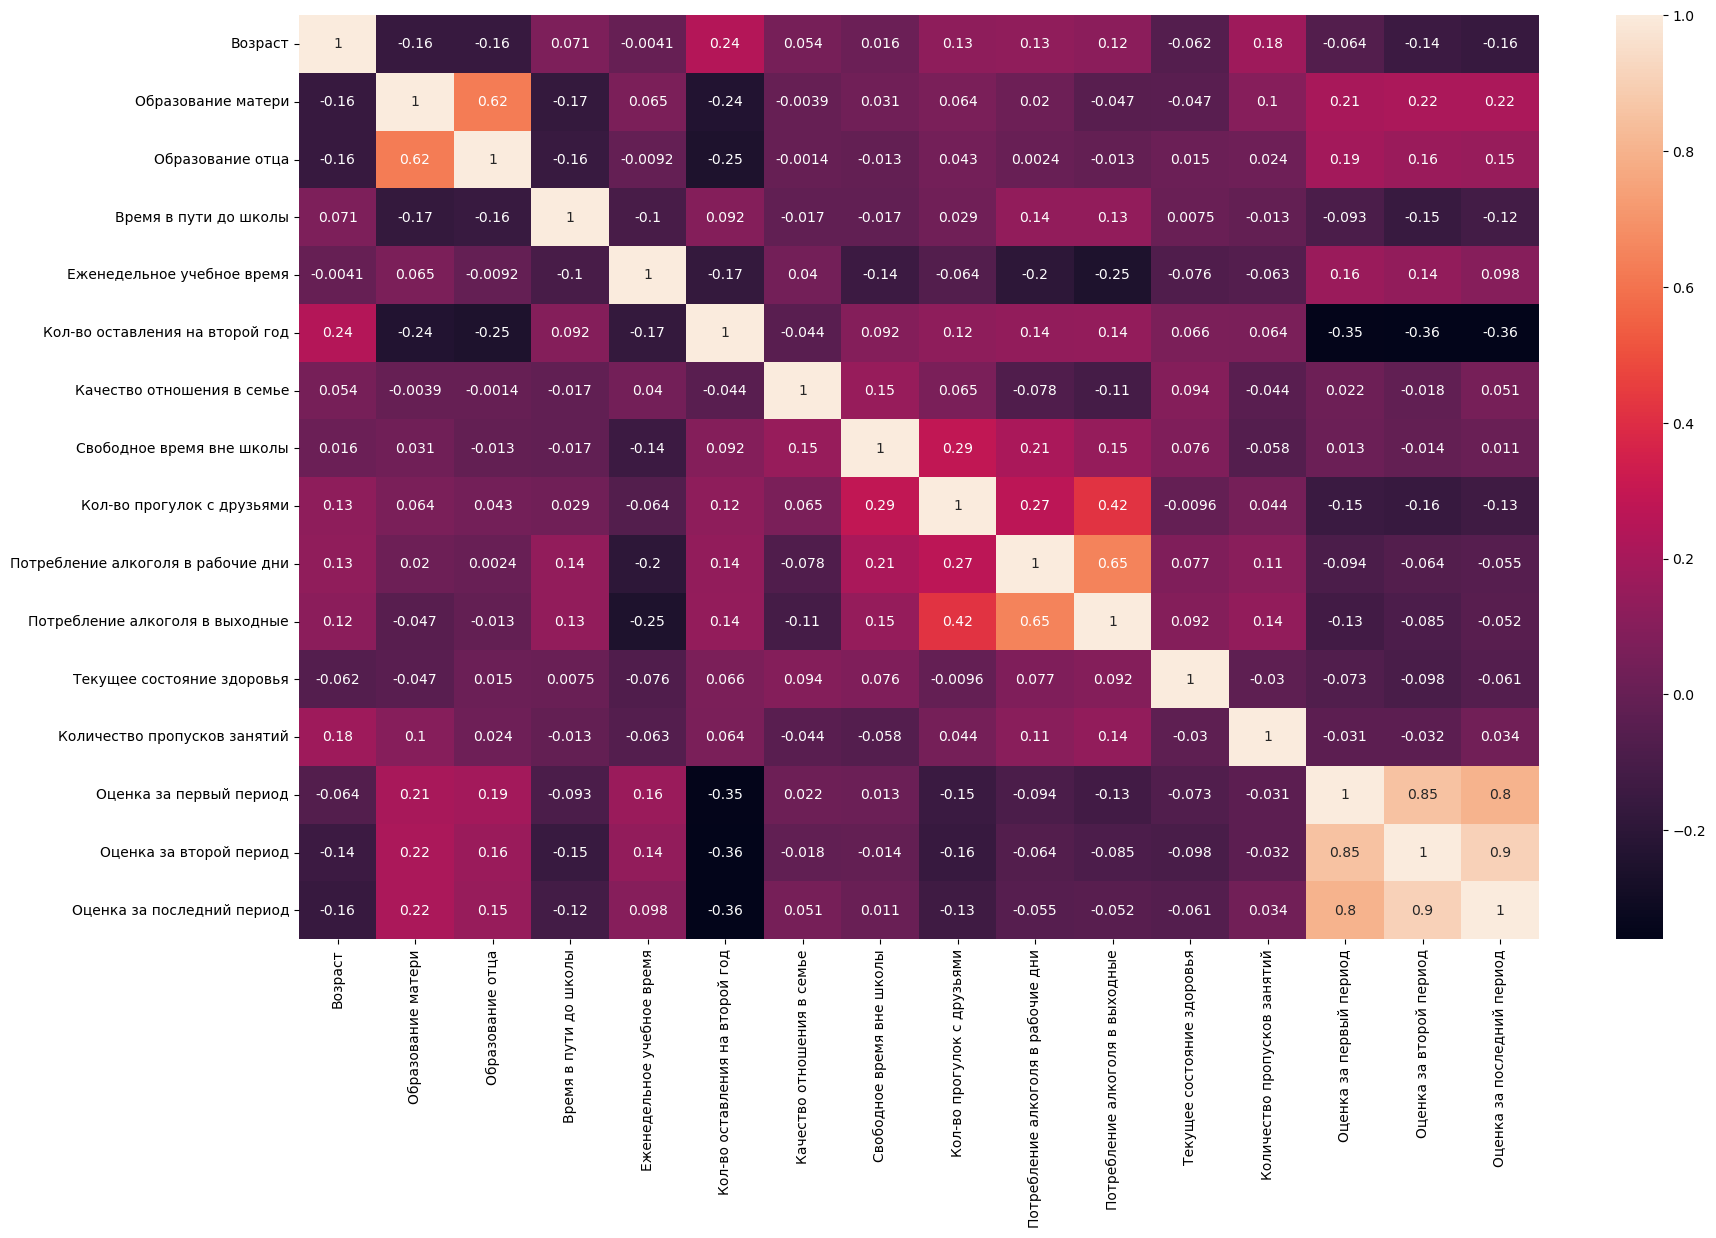

In [25]:
plt.figure(figsize=(20,12)) # настроим размеры
sns.heatmap(df_maths.corr(), annot=True)

Мы видим, что не все значения попали в матрицу корреляции, это произошло из-за того, что не все они были преобразованы в числа, нужно это исправить

In [26]:
# выполняем преобразование колонок, которые не являются числами
new_df_maths = df_maths.copy()

encoder = LabelEncoder()

new_df_maths['Навзание школы'] = encoder.fit_transform(new_df_maths['Навзание школы'])
new_df_maths['Пол'] = encoder.fit_transform(new_df_maths['Пол'])
new_df_maths['Совместное проживания родителей'] = encoder.fit_transform(new_df_maths['Совместное проживания родителей'])
new_df_maths['Посещение платных занятий'] = encoder.fit_transform(new_df_maths['Посещение платных занятий'])
new_df_maths['Образование отца'] = encoder.fit_transform(new_df_maths['Образование отца'])
new_df_maths['Образование матери'] = encoder.fit_transform(new_df_maths['Образование матери'])
new_df_maths['Желание получить высшее образование'] = encoder.fit_transform(new_df_maths['Желание получить высшее образование'])
new_df_maths['Состоит ли в отношениях'] = encoder.fit_transform(new_df_maths['Состоит ли в отношениях'])
new_df_maths['Есть ли доступ в интернет'] = encoder.fit_transform(new_df_maths['Есть ли доступ в интернет'])
new_df_maths['Посещение доп. кружков в школе'] = encoder.fit_transform(new_df_maths['Посещение доп. кружков в школе'])
new_df_maths['Посещение доп. занятий вне школы'] = encoder.fit_transform(new_df_maths['Посещение доп. занятий вне школы'])
new_df_maths['Причина выбора школы'] = encoder.fit_transform(new_df_maths['Причина выбора школы'])
new_df_maths['Посещение внеклассных занятий'] = encoder.fit_transform(new_df_maths['Посещение внеклассных занятий'])
new_df_maths['Посещал ли дет. сад'] = encoder.fit_transform(new_df_maths['Посещал ли дет. сад'])


<AxesSubplot:>

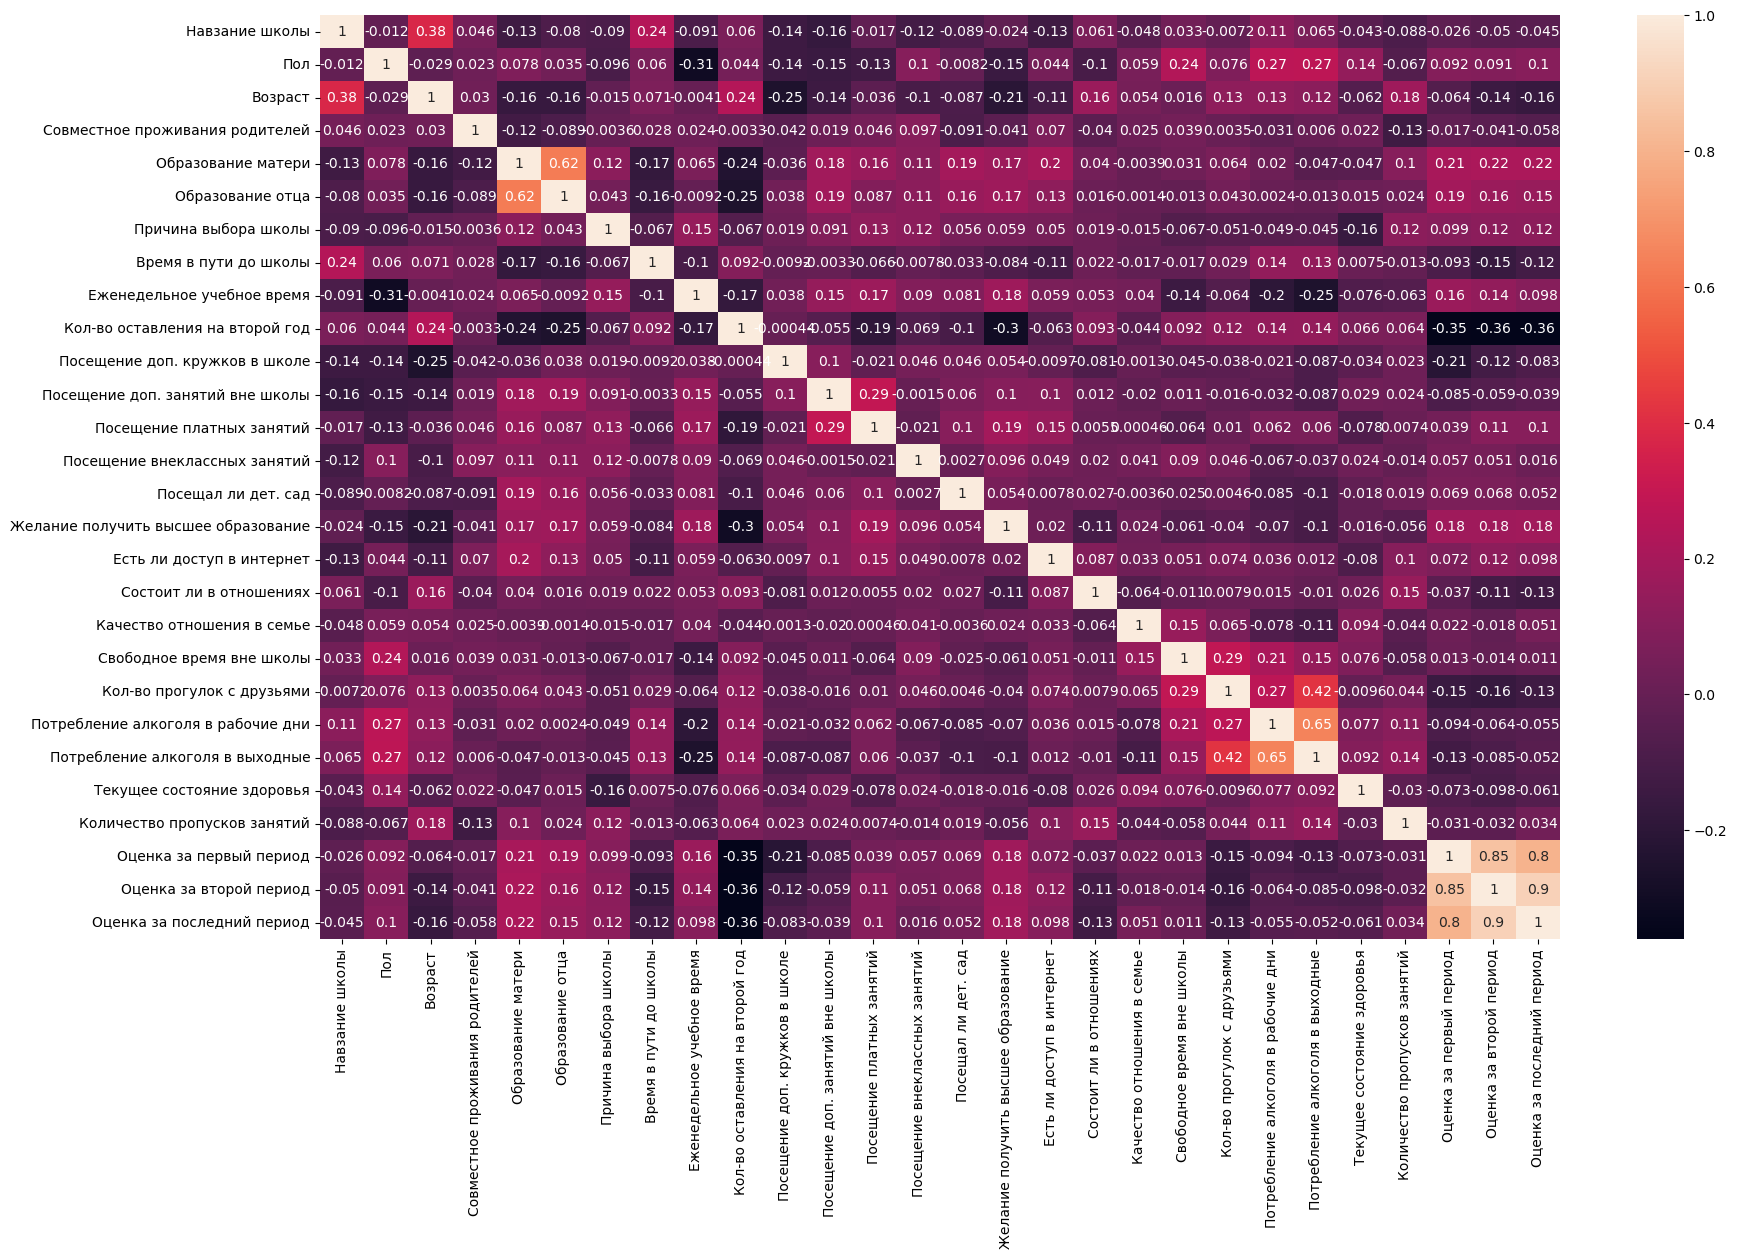

In [27]:
plt.figure(figsize=(20,12)) # настроим размеры
sns.heatmap(new_df_maths.corr(), annot=True)

# Вывод по алкоголю

Исходя из того, что употребление алкоголя и оценки за первый период, второй период и последний СЛАБО коррелируют, то можно сделать вывод, что алкоголь даёт незначительное влияние на успеваемость.

А точнее

Корреляция Оценки за первый период и употребление алкоголя в будние дни: -0.094159	
Корреляция Оценки за второй период и употребление алкоголя в будние дни: -0.064120
Корреляция Оценки за последний период и употребление алкоголя в будние дни: -0.054660

Такая же ситуация и с выходными днями

Корреляция Оценки за первый период и употребление алкоголя в выходные дни: -0.126179
Корреляция Оценки за второй период и употребление алкоголя в выходные дни: -0.084927
Корреляция Оценки за последний период и употребление алкоголя в выходные дни: -0.051939

# Вывод по корреляции с оценкой

Самую высокую корреляцию дают другие данные, давайте их найдем

In [28]:
corr_matrix = new_df_maths.corr()

# Изолируем нашу оценку
corr_target = corr_matrix[['Оценка за первый период', 'Оценка за второй период', 'Оценка за последний период']].drop(labels=['Оценка за первый период', 'Оценка за второй период', 'Оценка за последний период'])
corr_target

,Оценка за первый период,Оценка за второй период,Оценка за последний период
Навзание школы,-0.025731,-0.050086,-0.045017
Пол,0.091839,0.091099,0.103456
Возраст,-0.064081,-0.143474,-0.161579
Совместное проживания родителей,-0.016868,-0.041382,-0.058009
Образование матери,0.205341,0.215527,0.217147
Образование отца,0.190270,0.164893,0.152457
Причина выбора школы,0.099491,0.117775,0.121994
Время в пути до школы,-0.093040,-0.153198,-0.117142
Еженедельное учебное время,0.160612,0.135880,0.097820
Кол-во оставления на второй год,-0.354718,-0.355896,-0.360415


<AxesSubplot:>

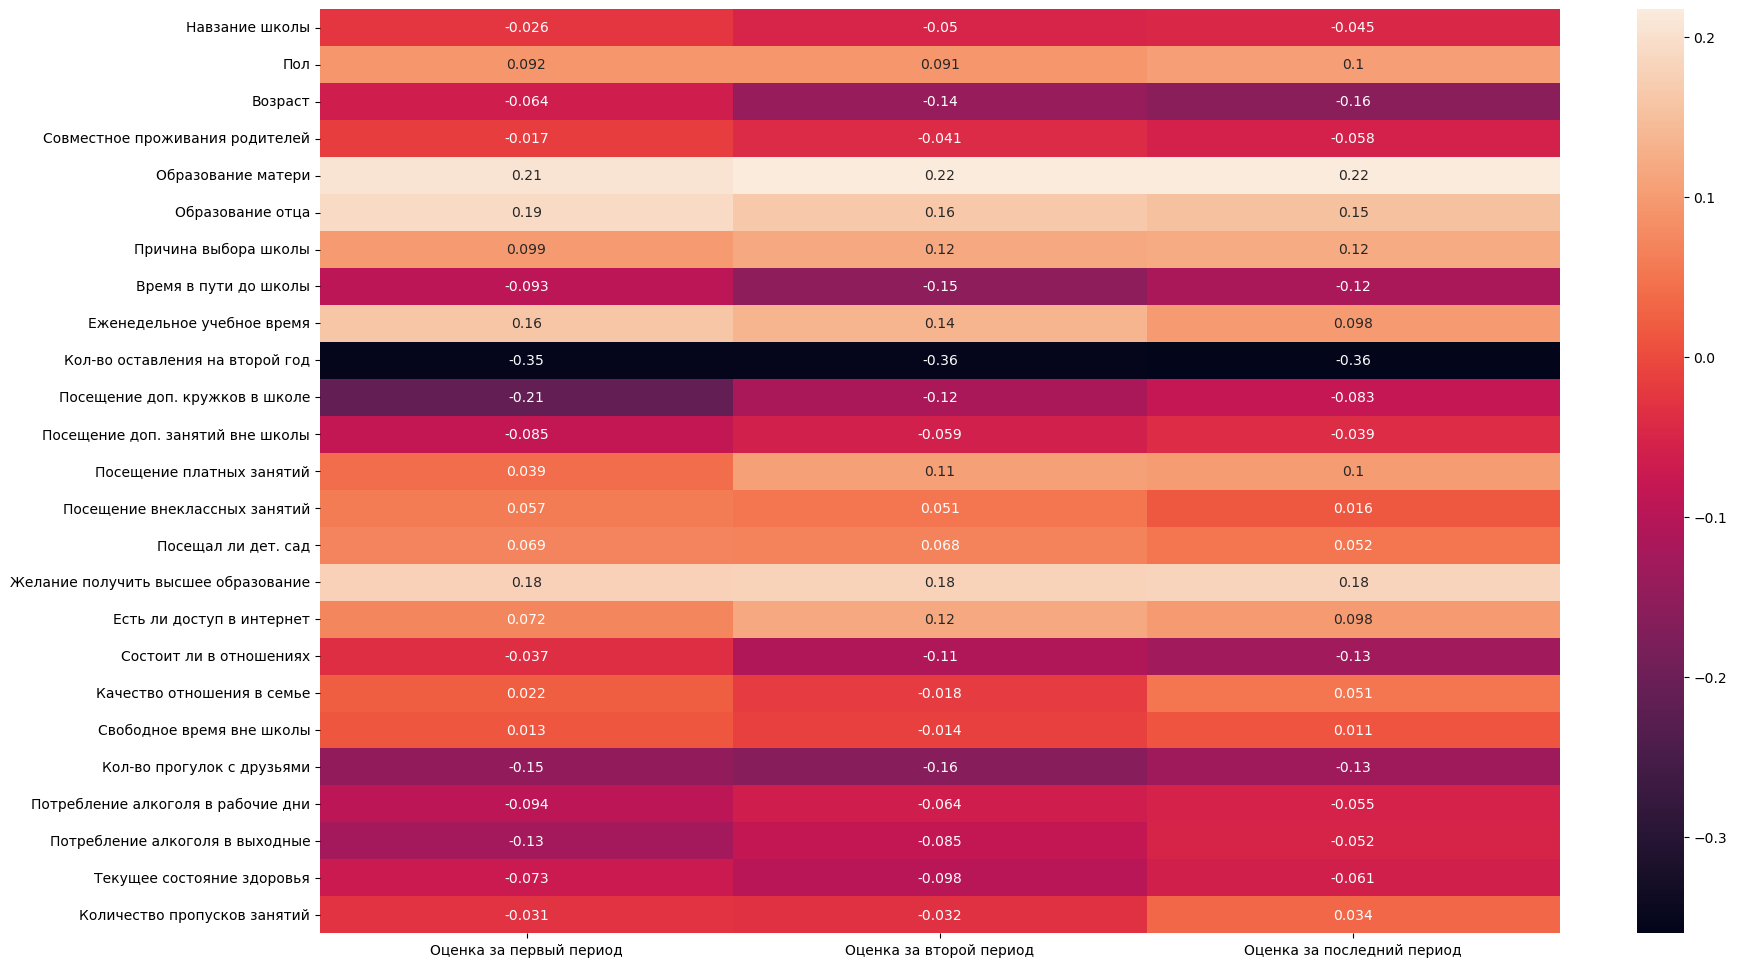

In [29]:
plt.figure(figsize=(20,12)) # настроим размеры
sns.heatmap(corr_target, annot=True)

Видим, что данных, которые не коррелирует много, предлагаю отфильтровать их по корреляции выше 0.1

In [30]:
corr_target = corr_matrix[['Оценка за первый период']].drop(labels=['Оценка за первый период']).query("`Оценка за первый период` > 0.1")
corr_target

,Оценка за первый период
Образование матери,0.205341
Образование отца,0.190270
Еженедельное учебное время,0.160612
Желание получить высшее образование,0.178264
Оценка за второй период,0.852118
Оценка за последний период,0.801468


<AxesSubplot:>

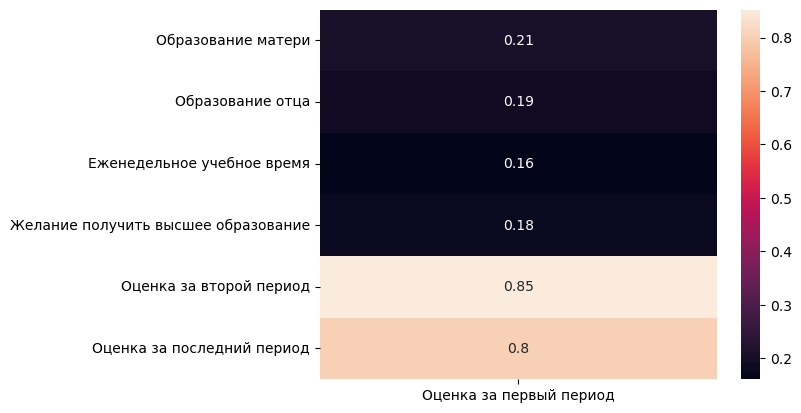

In [31]:
sns.heatmap(corr_target, annot=True)

# Выводы по тому, что коррелирует

Исходя из матрицы, можно понять, что на оценку, в большей степени влияет образование матери, образование отца, затраченное время на обучения, посещение платных занятий и желание получить высшее образование.

Алкоголь не попал в этот анализ, так же как и остальные малорешающие факторы

### Общие выводы

1. Уровень употребления алкоголя не влияет на успеваемость студента
2. Большее влияние на оценку студента оказывает образование родителей и уделямое время учебе
3. Уровень употребления алкоголя в деревне выше, чем в городе (71.5% против 58.9%)
4. Достаточной корреляции между желанием получить высшее образование и употреблением алкоголя нет
5. Уровень употребления алкоголя у мальчиков выше, чем у девочек на 16%